<a href="https://colab.research.google.com/github/z1gyy/Data-Analysis/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/z1gyy/Data-Analysis/main/CC%20GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Following is the Data Dictionary for Credit Card dataset:

CUSTID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases

BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES: Amount of purchase done in installment

CASHADVANCE: Cash in advance given by the user

PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

PURCHASESTRX: Numbe of purchase transactions made

CREDITLIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

We can see that in this date set there are about 300 null values so for the analyzis i have decided to drop them

In [33]:
df.isna().sum().sort_values(ascending=False)
df.dropna(inplace=True)

In [34]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


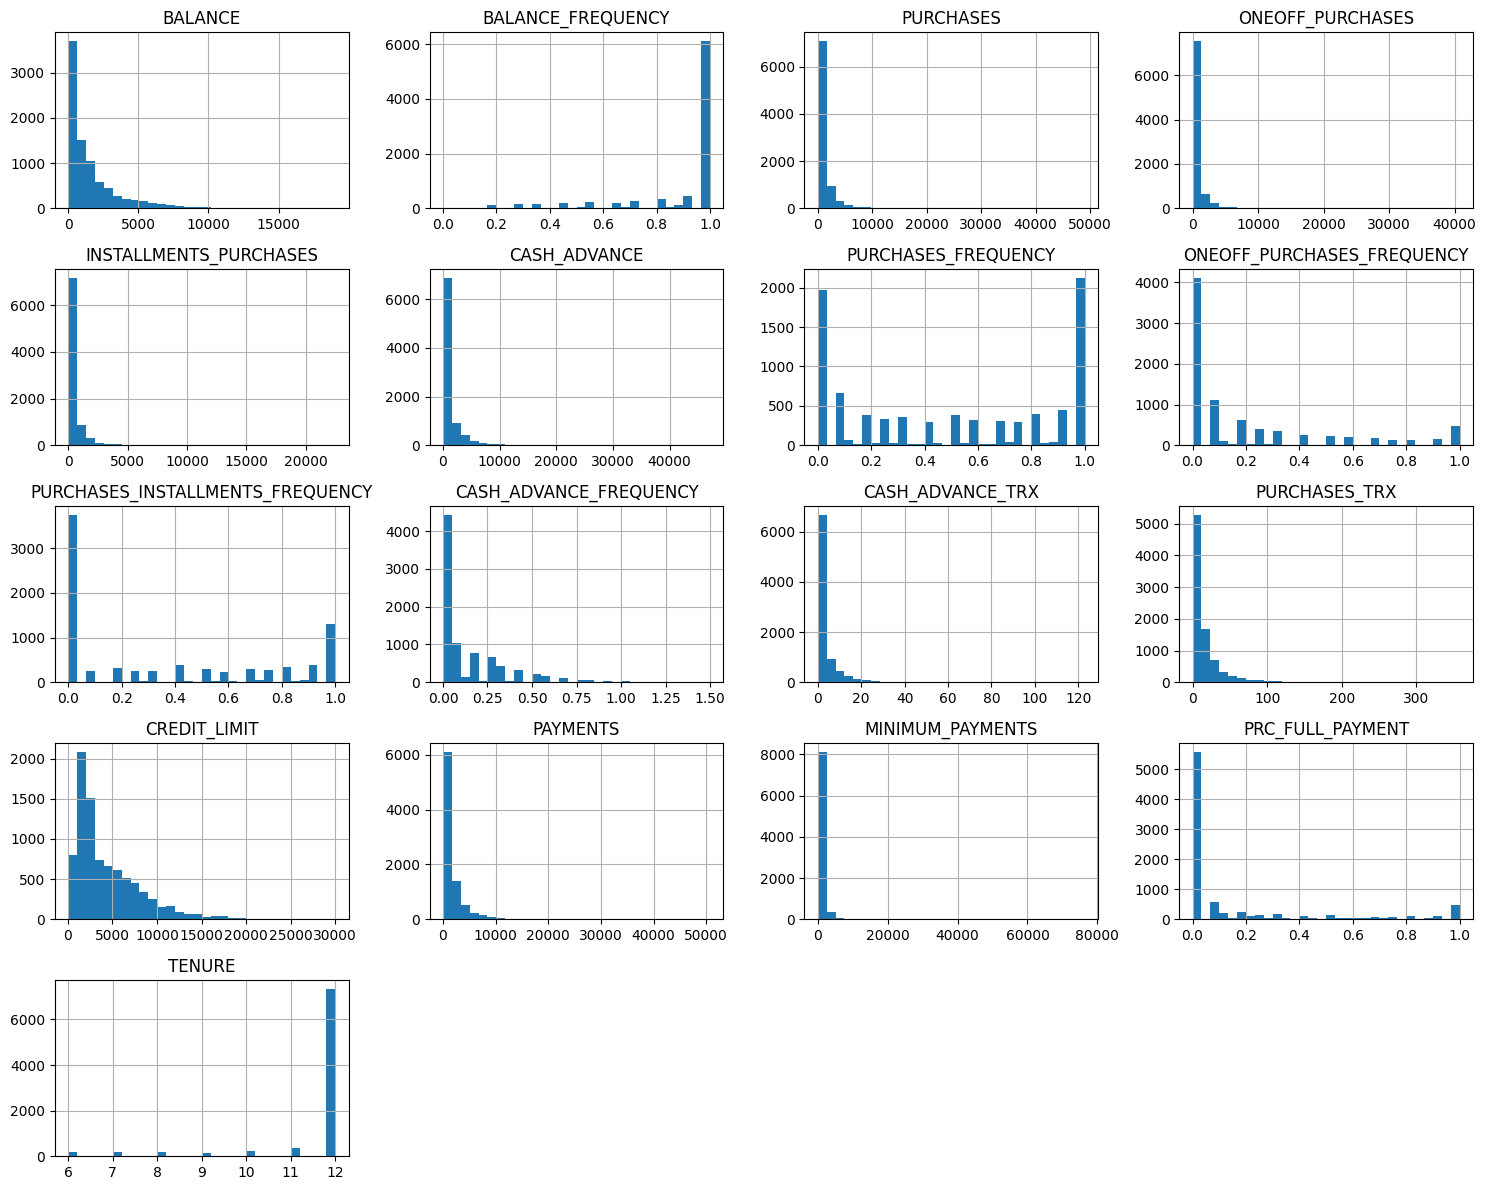

In [35]:
# Plot histograms for each numerical feature
df.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

tenure_category
9-12 months    7928
6-9 months      524
3-6 months      184
Name: count, dtype: int64


<ipython-input-36-b2a75190a23b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tenure_category', palette='viridis')


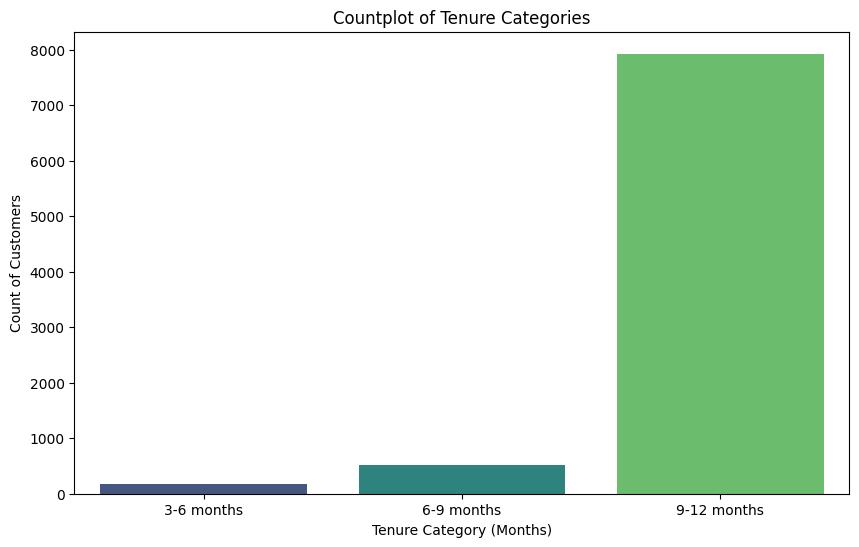

In [36]:
bins = [3, 6, 9, 12]
labels = ['3-6 months', '6-9 months', '9-12 months']

df['tenure_category'] = pd.cut(df['TENURE'], bins=bins, labels=labels)

category_counts = df['tenure_category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_category', palette='viridis')
plt.title('Countplot of Tenure Categories')
plt.xlabel('Tenure Category (Months)')
plt.ylabel('Count of Customers')
plt.show()


We can see that most of customers are 9-12 months

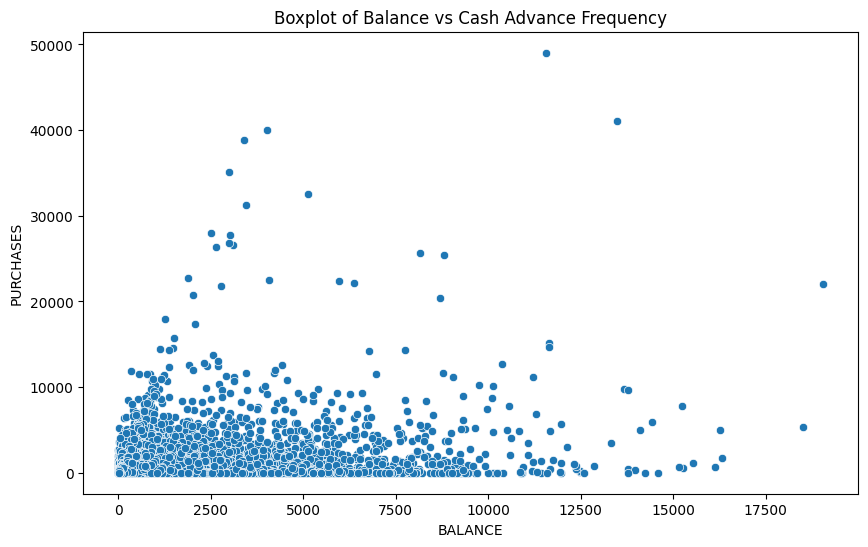

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')
plt.title('Boxplot of Balance vs Cash Advance Frequency')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

Users with lower balance have higher purchases rate

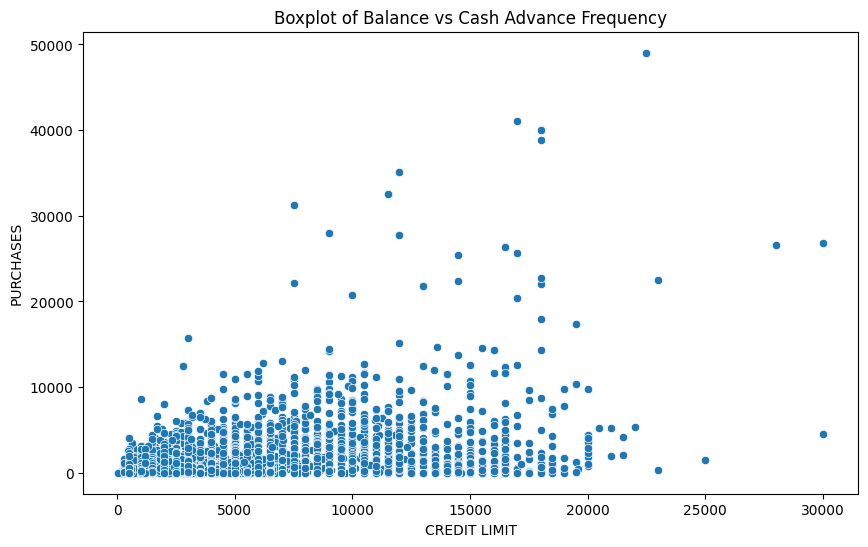

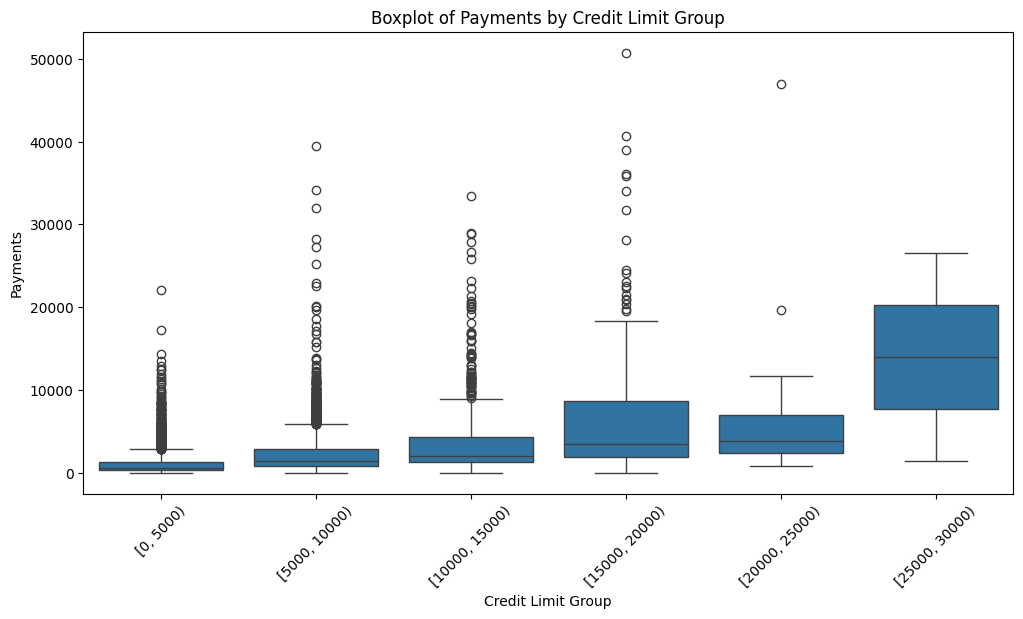

credit_limit_group
[0, 5000)         5428
[5000, 10000)     2382
[10000, 15000)     644
[15000, 20000)     159
[20000, 25000)      19
[25000, 30000)       2
Name: count, dtype: int64


In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES')
plt.title('Boxplot of Balance vs Cash Advance Frequency')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES')
plt.show()

df['credit_limit_group'] = pd.cut(df['CREDIT_LIMIT'], bins=range(0, int(df['CREDIT_LIMIT'].max()) + 5000, 5000), right=False)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='credit_limit_group', y='PAYMENTS')
plt.title('Boxplot of Payments by Credit Limit Group')
plt.xlabel('Credit Limit Group')
plt.ylabel('Payments')
plt.xticks(rotation=45)
plt.show()

credit_limit_counts = df['credit_limit_group'].value_counts().sort_index()
print(credit_limit_counts)

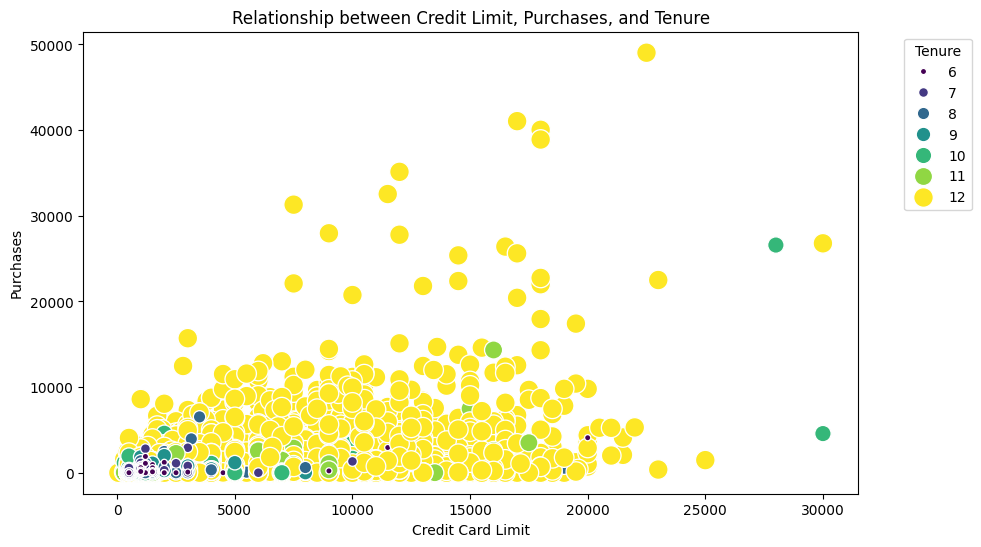

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for the relationship between LIMIT, PURCHASES, and TENURE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='TENURE', palette='viridis', size='TENURE', sizes=(20, 200))
plt.title('Relationship between Credit Limit, Purchases, and Tenure')
plt.xlabel('Credit Card Limit')
plt.ylabel('Purchases')
plt.legend(title='Tenure', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Customers with high credit limits and frequent purchases are more likely to be high-value, long-term customers

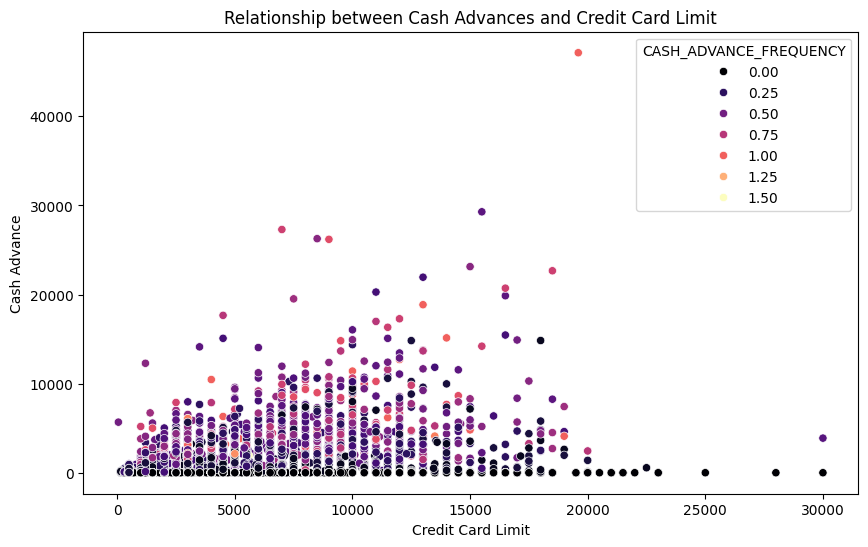

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='CASH_ADVANCE', hue='CASH_ADVANCE_FREQUENCY', palette='magma')
plt.title('Relationship between Cash Advances and Credit Card Limit')
plt.xlabel('Credit Card Limit')
plt.ylabel('Cash Advance')
plt.show()

Customers with high cash advances might be facing financial distress or are using the card as a temporary liquidity solution.

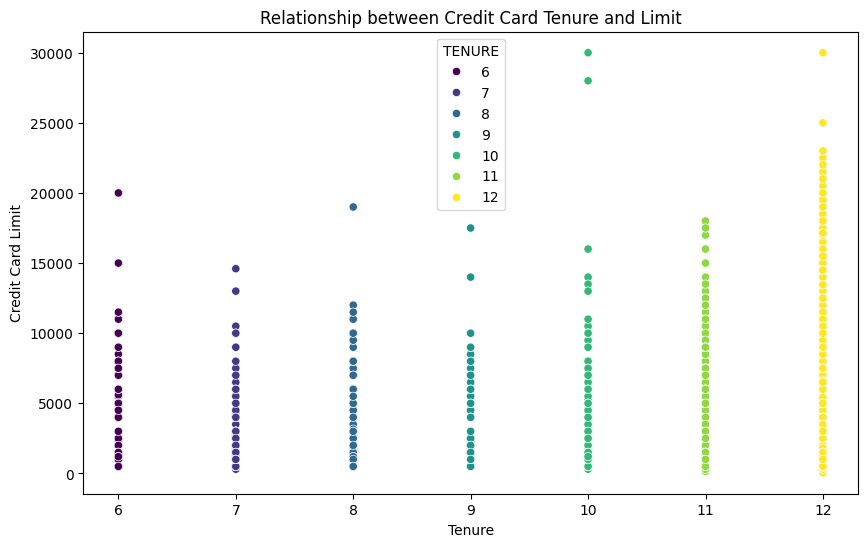

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TENURE', y='CREDIT_LIMIT', hue='TENURE', palette='viridis')
plt.title('Relationship between Credit Card Tenure and Limit')
plt.xlabel('Tenure')
plt.ylabel('Credit Card Limit')
plt.show()

 Long-tenure customers may have higher levels of trust in the bank and be less likely to switch to competitors.

<ipython-input-42-63693e49b0e5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='PRC_FULL_PAYMENT', y='BALANCE', alpha=0.7, palette='coolwarm')


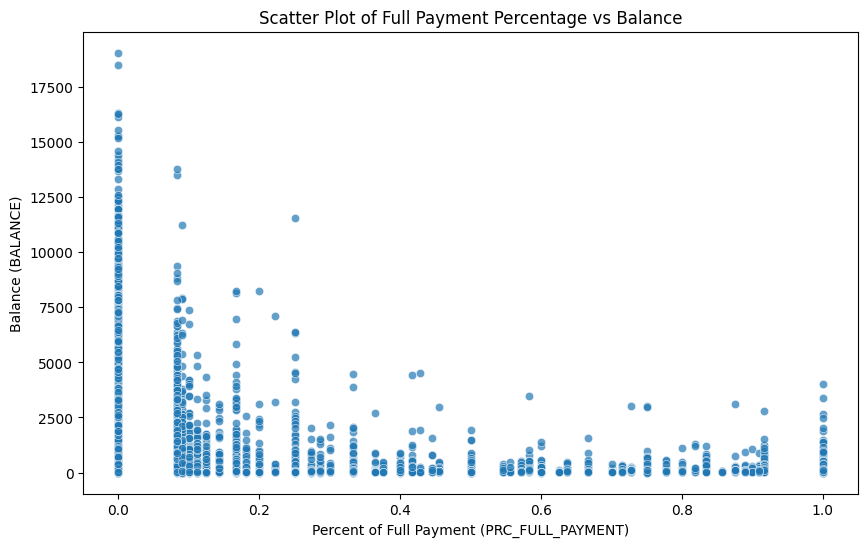

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PRC_FULL_PAYMENT', y='BALANCE', alpha=0.7, palette='coolwarm')
plt.title('Scatter Plot of Full Payment Percentage vs Balance')
plt.xlabel('Percent of Full Payment (PRC_FULL_PAYMENT)')
plt.ylabel('Balance (BALANCE)')
plt.show()

Customers with a higher frequency of full payment (PRC_FULL_PAYMENT) tend to have a lower balance (BALANCE).

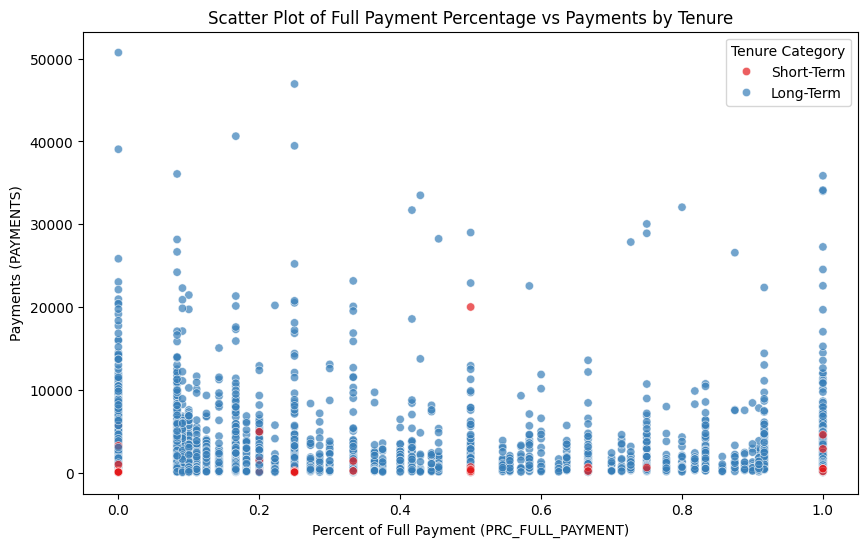

In [43]:
tenure_bins = pd.cut(df['TENURE'], bins=[0, 6, 12], labels=['Short-Term', 'Long-Term'])
df['TENURE_BIN'] = tenure_bins

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PRC_FULL_PAYMENT', y='PAYMENTS', hue='TENURE_BIN', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Full Payment Percentage vs Payments by Tenure')
plt.xlabel('Percent of Full Payment (PRC_FULL_PAYMENT)')
plt.ylabel('Payments (PAYMENTS)')
plt.legend(title='Tenure Category')
plt.show()

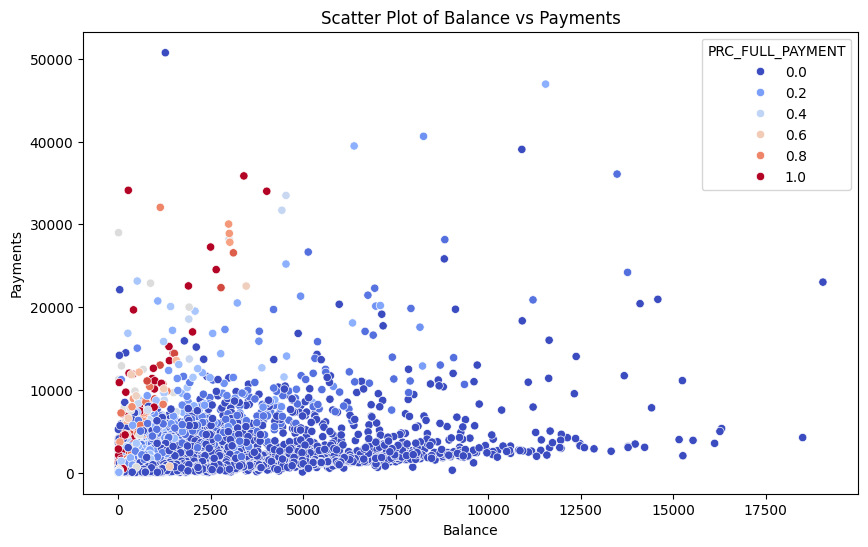

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS', hue='PRC_FULL_PAYMENT', palette='coolwarm')
plt.title('Scatter Plot of Balance vs Payments')
plt.xlabel('Balance')
plt.ylabel('Payments')
plt.show()

Clustering

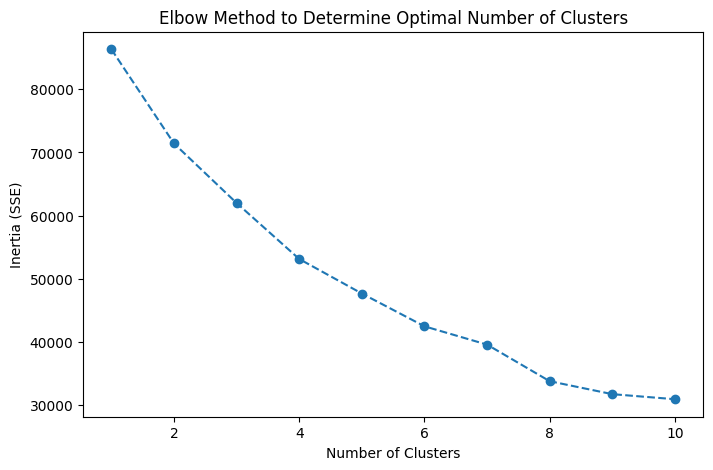

In [45]:
features = [
    'BALANCE',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'CREDIT_LIMIT',
    'PRC_FULL_PAYMENT',
    'PAYMENTS',
    'TENURE'
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

inertia = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.show()



In [64]:
# Perform K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

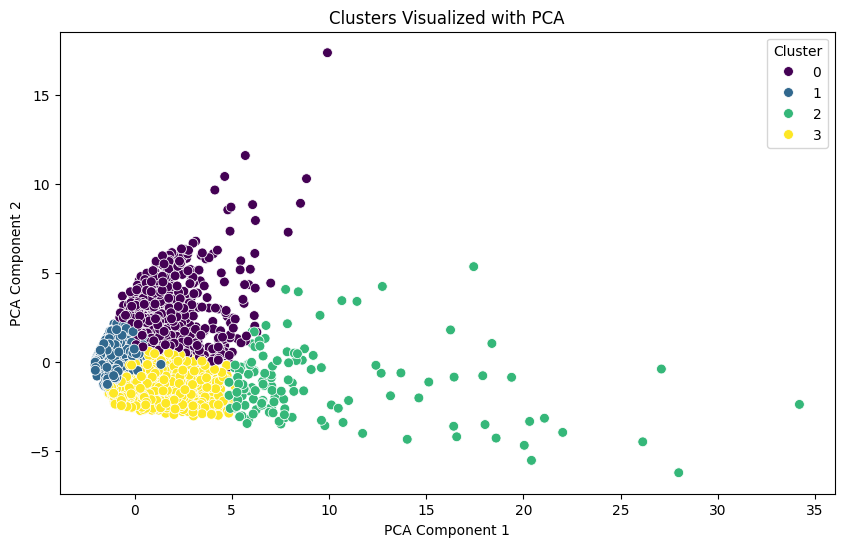

In [65]:
# PCA Visualization of Clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


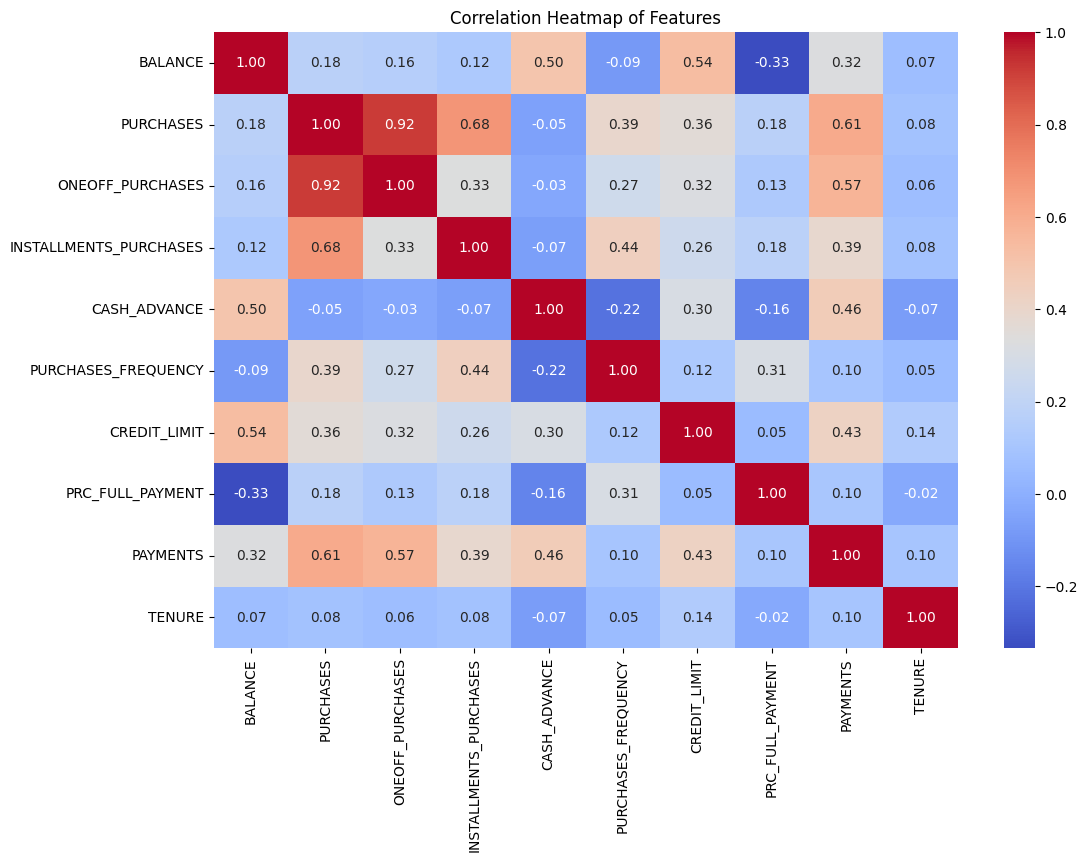

In [66]:
# Heatmapa korelací mezi proměnnými
plt.figure(figsize=(12, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

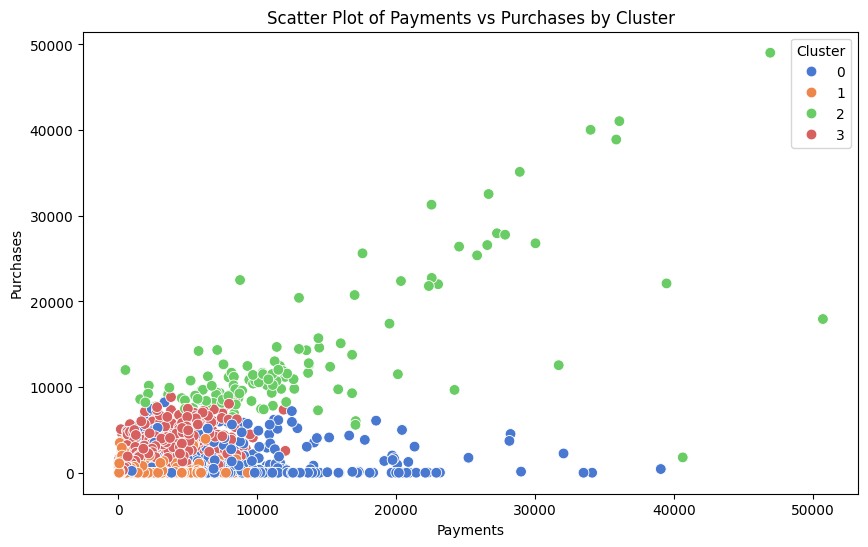

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PAYMENTS', y='PURCHASES', hue='Cluster', palette='muted', s=60)
plt.title('Scatter Plot of Payments vs Purchases by Cluster')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.legend(title='Cluster')
plt.show()

In [68]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print("Number of Customers in Each Cluster:")
print(df['Cluster'].value_counts())

Number of Customers in Each Cluster:
Cluster
1    4042
3    3410
0    1056
2     128
Name: count, dtype: int64


Cluster Summary (Averages):

             BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                        
0        5537.232337    994.652500        612.445341              382.291392   
1        1176.757053    257.528973        192.885049               64.971531   
2        4219.846321  13332.452109       8941.061094             4391.391016   
3         787.175510   1483.228129        778.032067              705.569519   

         CASH_ADVANCE  PURCHASES_FREQUENCY  CREDIT_LIMIT  PRC_FULL_PAYMENT  \
Cluster                                                                      
0         4494.317808             0.398560   9397.826274          0.031394   
1          752.943282             0.195927   3055.912914          0.037729   
2          950.089847             0.923047  11583.593750          0.367920   
3          197.856882             0.865833   4485.036242          0.335191   

             PAYMENTS

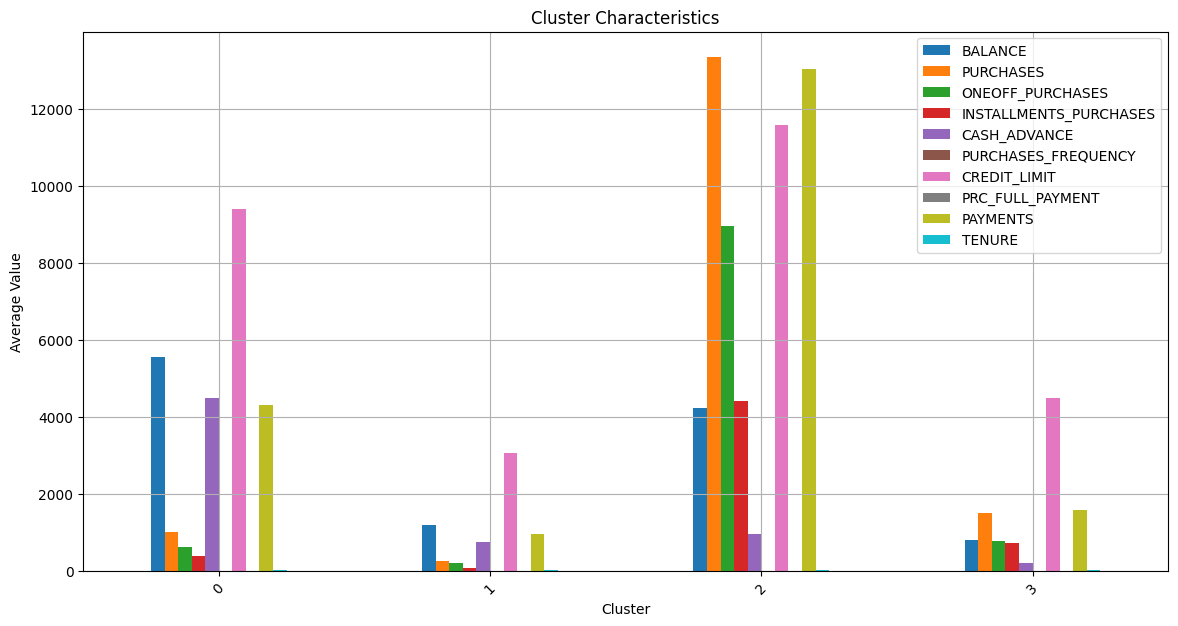

In [69]:
# Cluster Summary
def describe_clusters(df, features, cluster_col='Cluster'):
    cluster_summary = df.groupby(cluster_col)[features].mean()
    print("Cluster Summary (Averages):\n")
    print(cluster_summary)
    return cluster_summary

cluster_summary = describe_clusters(df, features)

cluster_summary.plot(kind='bar', figsize=(14, 7), title="Cluster Characteristics")
plt.xticks(rotation=45)
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

# Co jsme zjistili:
1. PCA visualization shows well-separated clusters.
2. Cluster characteristics reveal that:
   - Cluster 0 has high "CASH_ADVANCE" and low "PRC_FULL_PAYMENT" -> customers in financial distress.
   - Cluster 1 has low "BALANCE" and high "PURCHASES_FREQUENCY" -> regular, active customers.
   - Cluster 2 has high "CREDIT_LIMIT" and "TENURE" -> long-term, valuable customers.
   - Cluster 3 has low "CREDIT_LIMIT" and "PURCHASES" -> less active, potentially less valuable customers.

In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
df['Agg_Cluster'] = agg_cluster.fit_predict(scaled_data)

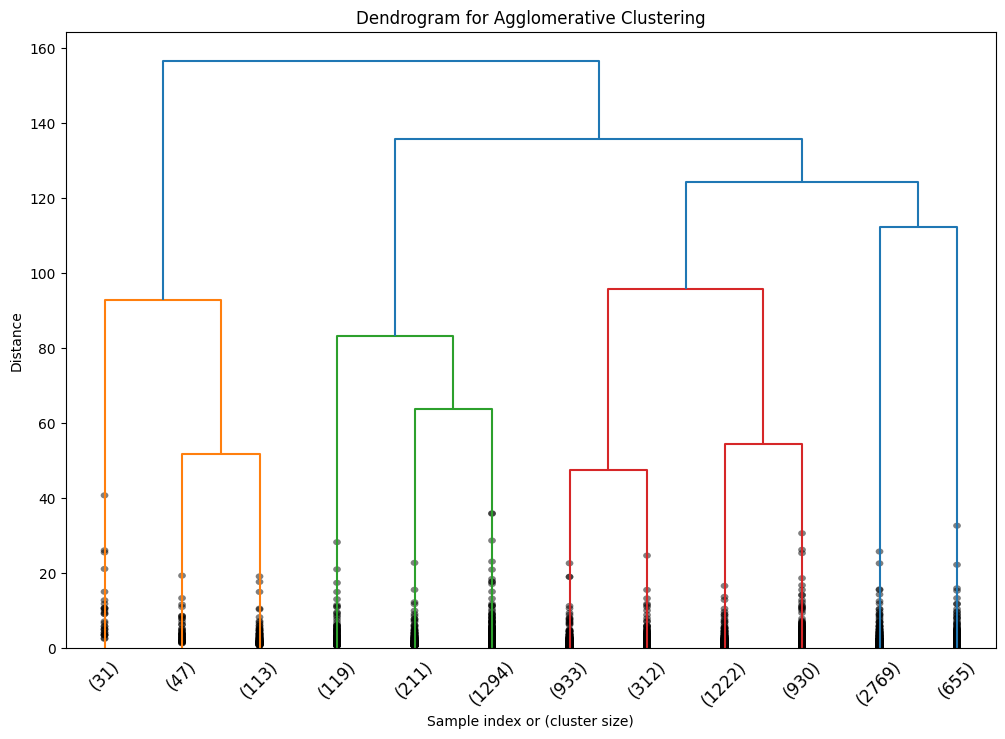

In [71]:
# Dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


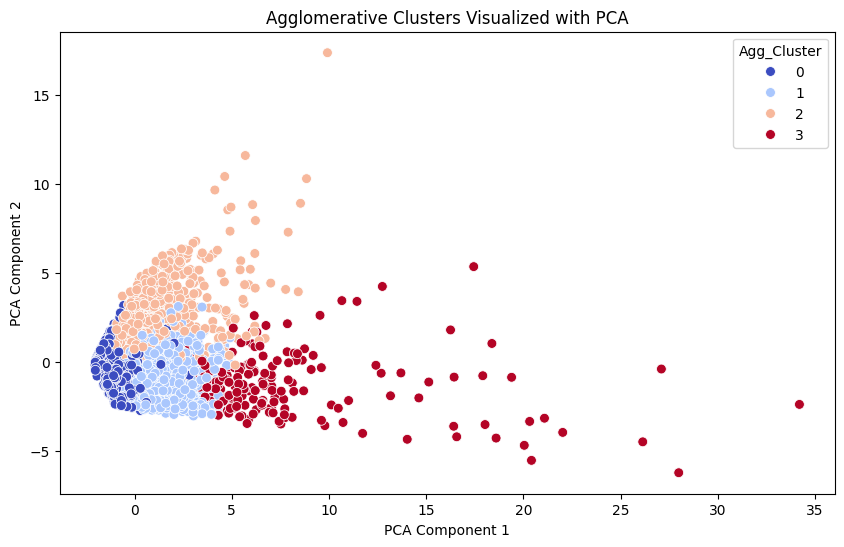

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Agg_Cluster'], palette='coolwarm', s=50)
plt.title('Agglomerative Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Agg_Cluster')
plt.show()

In [73]:
agg_cluster_summary = df.groupby('Agg_Cluster')[features].mean()
print("Agglomerative Cluster Summary (Averages):\n")
print(agg_cluster_summary)

Agglomerative Cluster Summary (Averages):

                 BALANCE     PURCHASES  ONEOFF_PURCHASES  \
Agg_Cluster                                                
0             904.853881    328.784328        221.972906   
1            1028.633162   1428.374422        719.446482   
2            4051.746925    484.048879        351.060573   
3            3432.746738  10950.817330       7590.636230   

             INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Agg_Cluster                                                              
0                        107.196782    484.992317             0.267895   
1                        709.117368    394.100296             0.843325   
2                        133.064458   3361.938221             0.201421   
3                       3363.322461    662.511747             0.912573   

             CREDIT_LIMIT  PRC_FULL_PAYMENT      PAYMENTS     TENURE  
Agg_Cluster                                                           
0        

# Co jsme zjistili:
1. Agglomerative Clustering provides an alternative customer segmentation to compare with K-Means.
2. The dendrogram illustrates hierarchical relationships, helping to understand inter-cluster relationships.
3. PCA visualization again highlights differences between clusters, though they may be less distinct than in K-Means.
4. Each cluster exhibits unique characteristics, offering different perspectives on the data.
